In [62]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

from collections import Counter

In [63]:
# Read data
df = pd.read_csv('data/data.csv', encoding='latin-1')
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [64]:
# Drop unnecassary columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [65]:
# Renaming columns
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

In [66]:
# Convert labels to numeric values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [67]:
# Take information about data
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None
             label
count  5572.000000
mean      0.134063
std       0.340751
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
label      0
message    0
dtype: int64
403


Text(0.5, 1.0, 'Count Distribution of Labels')

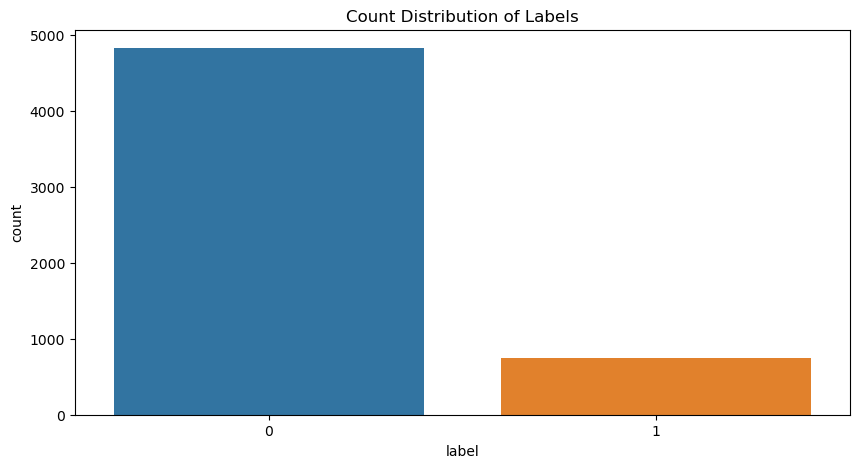

In [68]:
# EDA
# Count distribution analysis
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='label')
plt.title('Count Distribution of Labels')

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

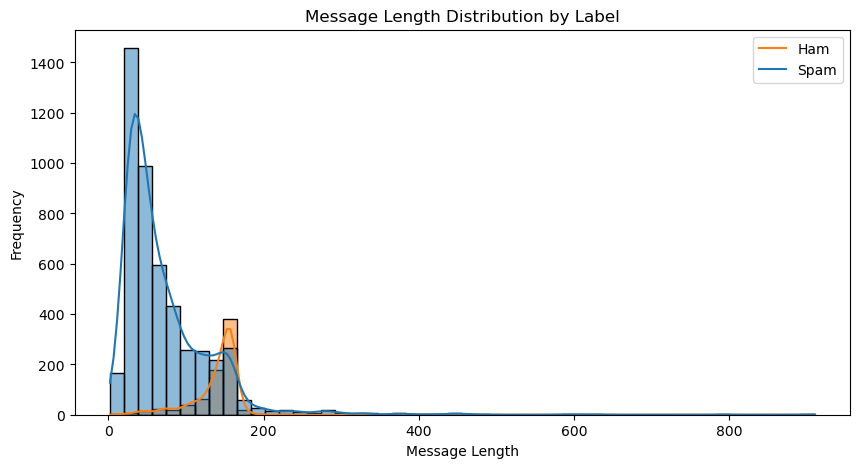

In [69]:
# Analyzing message length
df['message_length'] = df['message'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True)
plt.title('Message Length Distribution by Label')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(['Ham', 'Spam'])
plt.show()

In [70]:
# Analyze top words
def get_top_n_words(messages, n=20):
    words = ' '.join(messages).lower().split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return Counter(words).most_common(n)

top_ham_words = get_top_n_words(df[df['label'] == 0]['message'])
top_spam_words = get_top_n_words(df[df['label'] == 1]['message'])

print("Top Ham Words:", top_ham_words)
print("Top Spam Words:", top_spam_words)

Top Ham Words: [('u', 874), ("i'm", 369), ('just', 286), ('2', 284), ('&lt;#&gt;', 276), ('ur', 235), ('got', 227), ('.', 222), ('like', 221), ('come', 215), ('know', 208), ('good', 187), ('?', 181), ("i'll", 167), ('...', 162), ('going', 157), ('ok', 156), ('4', 156), ('want', 153), ('time', 153)]
Top Spam Words: [('free', 180), ('2', 169), ('ur', 144), ('txt', 136), ('u', 117), ('text', 112), ('mobile', 109), ('claim', 106), ('reply', 101), ('&', 98), ('4', 93), ('stop', 89), ('just', 77), ('now!', 70), ('new', 69), ('send', 65), ('won', 64), ('nokia', 64), ('win', 58), ('prize', 58)]


In [71]:
# Determine features and target
y = df['label']
X = df['message']

In [72]:
# Split data to train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [73]:
# Implement pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

In [74]:
# Fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [75]:
# Predict the output
y_pred = pipeline.predict(X_test)

In [76]:
# Check train and test scores
print(f"Train Score: {pipeline.score(X_train, y_train)}")
print(f"Test Score: {pipeline.score(X_test, y_test)}")

Train Score: 0.9946152120260264
Test Score: 0.9838565022421525


In [77]:
# Cross validation (5-fold)
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring="accuracy")
print(f"CV Scores: {cv_scores}")
print(f"Mean: {cv_scores.mean()}")

CV Scores: [0.98654709 0.98654709 0.98473968 0.98294434 0.98563734]
Mean: 0.9852831069712022


In [78]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[962   4]
 [ 14 135]]


In [79]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.97      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [80]:
# Manual testing
print(pipeline.predict(["Congratulations! You've won a $1000 Walmart gift card. Click here to claim."]))  # 1 (spam)
print(pipeline.predict(["Hey man, wanna grab lunch later?"]))  # 0 (ham)

[1]
[0]


In [81]:
# Save model for usage
joblib.dump(pipeline, 'model.pkl')

['model.pkl']